In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy import signal

In [2]:
fs, x=scipy.io.wavfile.read('./tuning-fork.wav')
q2=pow(2, 11)
time_delay=2000
x=x[time_delay:(time_delay+q2)]

print(u'Частота дискретизации f_s', fs, 'Гц')

Частота дискретизации f_s 44100 Гц


In [39]:
M=q2*1; # 1, 2, 4, 8

window = signal.boxcar(q2)
#window = signal.bartlett(q2)
#window = signal.hann(q2)
#window = signal.hamming(q2)

x=x*window

In [40]:
window

array([1., 1., 1., ..., 1., 1., 1.])

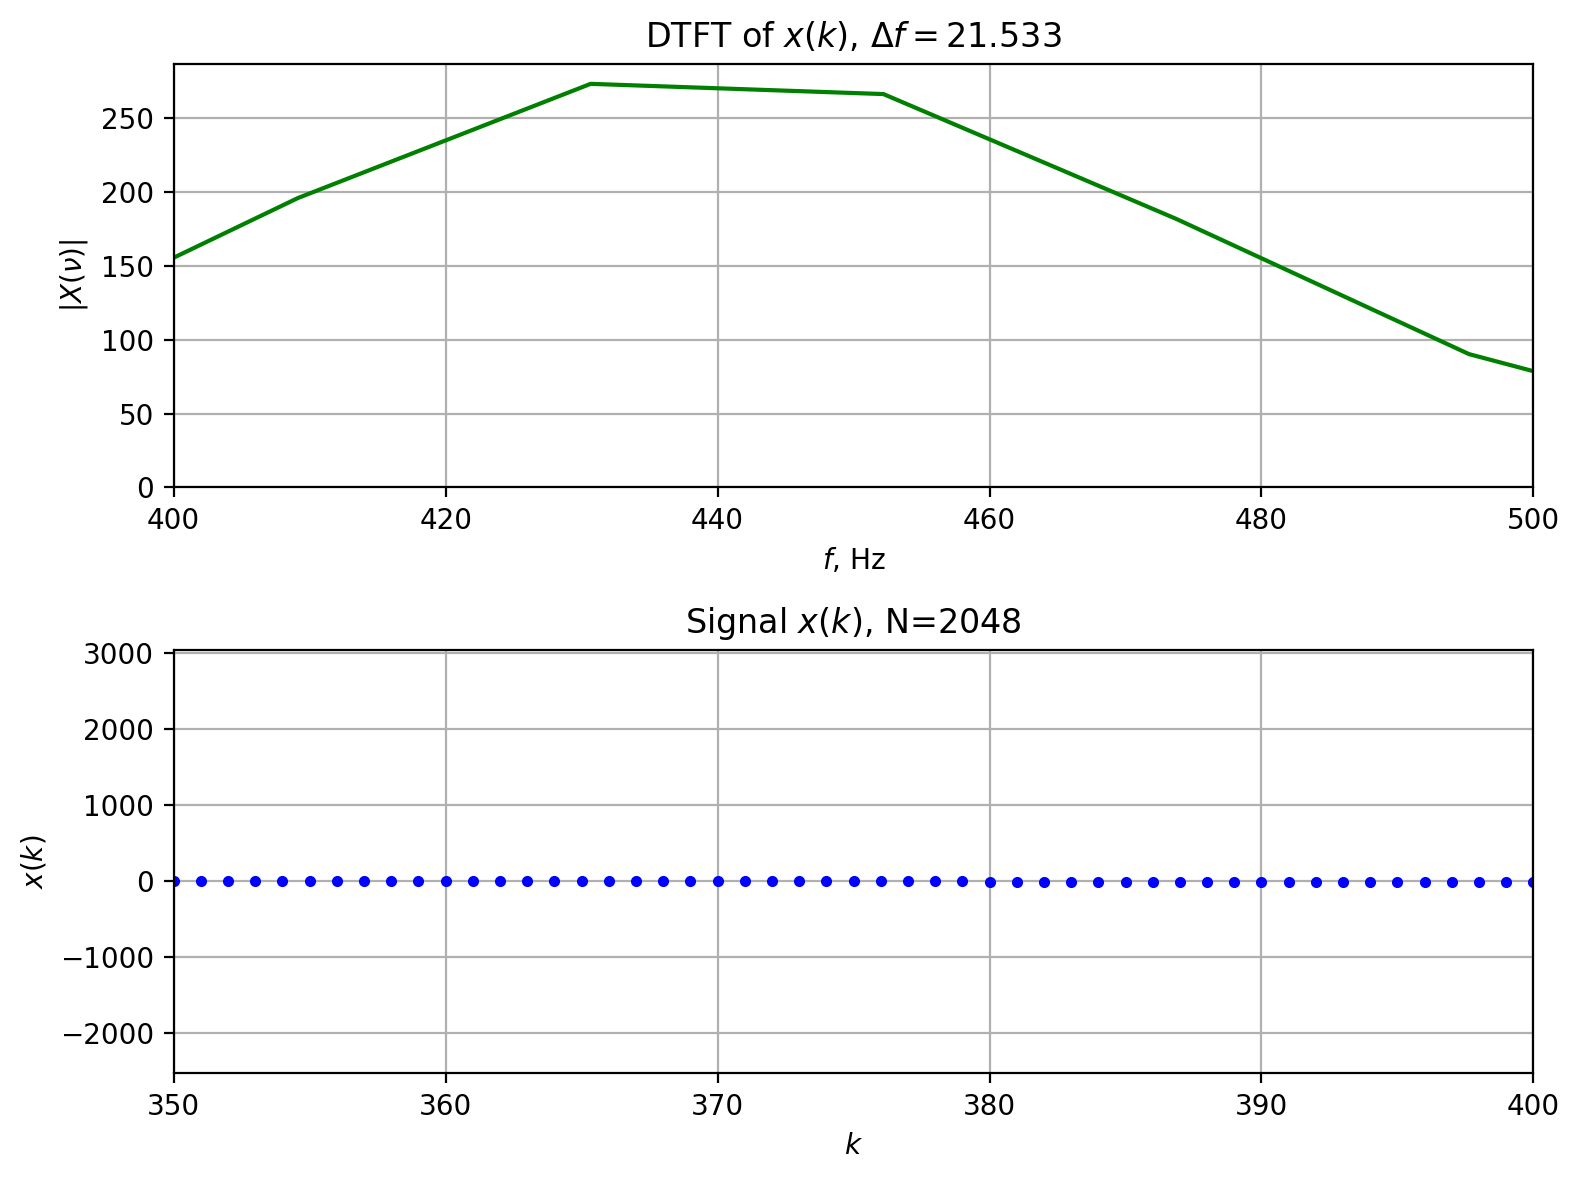

In [41]:
plt.figure(figsize=[8, 6], dpi=200)

plt.subplot(2,1,1)
plt.plot((-0.5+(np.arange(M)/M))*fs, 
         abs(np.fft.fftshift(np.fft.fft(x, M)))/M, 
         'g'); 
plt.axis(xmin=-fs/2, xmax=fs/2, ymin=0)
plt.axis(xmin=400, xmax=500, ymin=0)
#plt.xticks(np.arange(plt.axis()[0], plt.axis()[1], 1000))

plt.title(u'DTFT of $x(k)$, $\Delta f=%.3f $' %(fs/M))
plt.xlabel(u'$f$, Hz')
plt.ylabel(u'$|X(\\nu)|$')
plt.grid()

plt.subplot(2,1,2)
#plt.plot(np.arange(x.size), x, 'b.')
plt.plot(np.arange(x.size), x, 'b,')
#plt.axis(xmin=350, xmax=400)
plt.title(u'Signal $x(k)$, N=%i' %(x.size));
plt.xlabel(u'$k$');
plt.ylabel(u'$x(k)$');
plt.grid()

plt.tight_layout()

(400, 500, 0, 286.9524027561832)

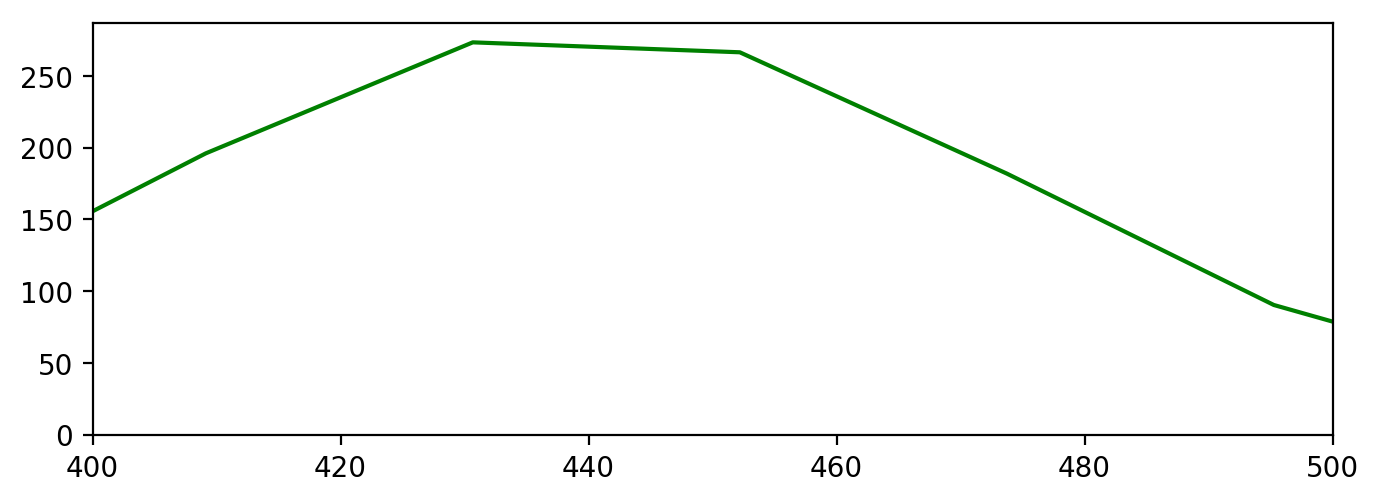

In [42]:
plt.figure(figsize=[8, 6], dpi=200)

plt.subplot(2,1,1)
plt.plot((-0.5+(np.arange(M)/M))*fs, 
         abs(np.fft.fftshift(np.fft.fft(x, M)))/M, 
         'g'); 
plt.axis(xmin=-fs/2, xmax=fs/2, ymin=0)
plt.axis(xmin=400, xmax=500, ymin=0)

In [43]:
(-0.5+(np.arange(M)/M))*fs

array([-22050.        , -22028.46679688, -22006.93359375, ...,
        21985.40039062,  22006.93359375,  22028.46679688])